# 正規分布とその応用

In [3]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline

## 正規分布の確率密度(scipy.stats.norm.pdf関数)

$N(x|\mu,\sigma^2) = \frac{1}{\sqrt(2\pi\sigma^2)} e^(-\frac{(x-\mu)^2}{2\sigma^2})$ <br>
ここで確率変数が3であるときの確率密度 $N(3|4,0.8^2)$ は以下で求まる

In [4]:
# 「平均4、分散0.64(標準偏差0.8)の正規分布」における、確率変数が3であるときの確率密度
x = 3
mu = 4
sigma = 0.8

1 / (sp.sqrt(2 * sp.pi * sigma**2)) * \
    sp.exp(- ((x - mu)**2) / (2 * sigma**2))

0.22831135673627742

In [5]:
stats.norm.pdf(loc=4,scale=0.8,x=3)

0.2283113567362774

ちなみに正規分布のインスタンスを先に作ってからpdf関数を呼び出しても良い

In [6]:
norm_dist = stats.norm(loc=4,scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

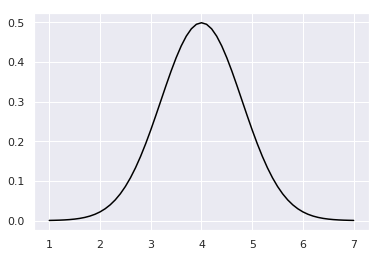

In [8]:
x_plot = np.arange(start=1,stop=7.1,step=0.1)
plt.plot(
    x_plot,
    stats.norm.pdf(x=x_plot,loc=4,scale=0.8),
    color='black'
)

## 累積分布関数(stats.norm.cdf関数)

### 標本がある値以下となる割合

In [10]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(loc=4,scale=0.8,size=10000)
simulated_sample

array([5.299, 3.511, 3.577, ..., 3.189, 3.95 , 2.85 ])

3以下となるデータの個数を求めたければ比較演算子

In [11]:
sp.sum(simulated_sample <= 3)

1043

In [12]:
sp.sum(simulated_sample <= 3) / len(simulated_sample)

0.1043

### 累積分布関数

確率変数$X$に対して,$x$を実数とするとき$F(X)$を累積分布関数あるいは分布関数と呼ぶ

$ F(X) = P(X \leq x) $

In [13]:
stats.norm.cdf(loc=4,scale=0.8,x=3)

0.10564977366685535

こちらもおおよそ10％で1.1の結果に等しい.pdf関数と間違えないように注意

このようにデータを数え上げることなく積分計算により確率を簡単に計算することができるのが<br>
母集団分布に正規分布を仮定したことのメリット

## パーセント点

### 下側確率とパーセント点

データがある値以下となる確率を下側確率と呼ぶ<br>
累積分布関数を用いることで導出できる<br>
<br>

逆に「ある確率になる基準値」をパーセント点と呼ぶ<br>

### パーセント点(stats.norm.ppf)

下側確率が2.5％となるパーセント点

In [15]:
stats.norm.ppf(loc=4,scale=0.8,q=0.025)

2.4320288123679563

下側確率とパーセント点との関係から以下がわかる

In [17]:
#cdf関数の引数にx=3を指定して3以下になる確率を求める（確率変数の値を確率に変換した）
sitagawa = stats.norm.cdf(loc=4,scale=0.8,x=3)
#パーセント点を求めるppfの引数にcdf関数の結果を入れるともとに戻る（確率が確率変数の値に戻る）
stats.norm.ppf(loc=4,scale=0.8,q=sitagawa)

3.0000000000000004

## 標準正規分布

平均0,分散1の正規分布を示す<br>
$N(x|0.1)$

## t値(標本平均に対する標準化)

t値は以下に示す統計量<br>
<br>
$ t = \frac{\hat\mu-\mu}{\hat\sigma/\sqrt(N)}$<br>
<br>
$\hat\mu$ : 標本平均<br>
$\mu    $ : 母平均<br>
$\hat\sigma$ : 標本から計算された標準偏差<br>
$N$ : サンプルサイズ

$t値 = \frac{標本平均-母平均}{標準誤差} $<br>
t値は標準化と似た計算をする$\frac{データ-平均}{標準偏差}$<br>
<br>
標準誤差は標本平均の標準偏差とみなせる<br>
つまりt値は標本平均に対する標準化とみなせる<br>
ここでは標本から計算された標準誤差を用いているので分散は1にならない

## t値の標本分布

母集団分布に正規分布を仮定すると、標本分布も論理的に定まる

In [19]:
# 乱数の種
np.random.seed(1)
# t値を格納する入れ物
t_value_array = np.zeros(10000)
# 正規分布クラスのインスタンス
norm_dist = stats.norm(loc = 4, scale = 0.8)
# シミュレーションの実行
for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof = 1)
    sample_se = sample_std / sp.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

10000試行分のt値が格納されている<br>
10000試行分のヒストグラムを描く.これがt値の標本分布<br>
カーネル密度推定の値も合わせて図示

/home/yu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


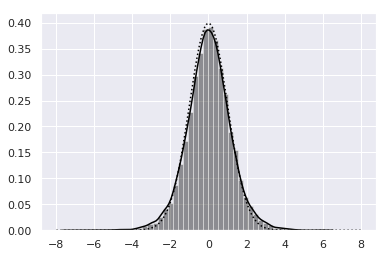

In [20]:
# 標準化された標本平均のヒストグラム
sns.distplot(t_value_array, color = 'black')

# 標準正規分布の確率密度
x = np.arange(start = -8, stop = 8.1, step = 0.1)
plt.plot(x, stats.norm.pdf(x = x), 
         color = 'black', linestyle = 'dotted')

点線は標準正規分布<br>
ここで実線（ヒストグラムのカーネル密度推定）と点線（標準正規分布にはズレがある）<br>
不偏性が満たされているので標本平均の平均値は母平均と等しくなる<br>
標本平均-母平均/標準誤差の結果における分布の中心は0となっている<br>
<br>
標準誤差でわっているにもかかわらず分布の裾が少し広くなっているのは、分散が1よりも大きくなっているということ<br>
標本から計算された標準誤差で割っているのが理由

## $t$ 分布

母集団分布が正規分布であるときの$t$ 値の標本分布を$t$ 分布とよぶ<br>
サンプルサイズが$N$のとき$N-1$としたものを自由度と呼ぶ<br>
$t$分布の形状は自由度に依存する。自由度$n$と置くと$t$分布は$t(n)$と表記される<br><br>
$t$分布の平均値は0<br>
$t$分布の分散は1よりも少しだけ大きくなる<br>
<br>
$t(n)$の分散 = $\frac{n}{n-2}$<br>
<br>
自由度が大きくなると分散は1に近づき、標準正規分布と違いがみられなくなる<br>
<br>

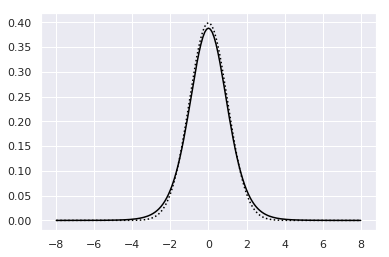

In [21]:
plt.plot(x, stats.norm.pdf(x = x), 
         color = 'black', linestyle = 'dotted')
plt.plot(x, stats.t.pdf(x = x, df = 9), 
         color = 'black')

実線（t分布の確率密度）と点線（標準正規分布の確率密度）をあわせて図示している<br>
標準正規分布に比べると裾広がりで、平均値と大きく異なるデータが発生しやすいことがわかる

/home/yu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


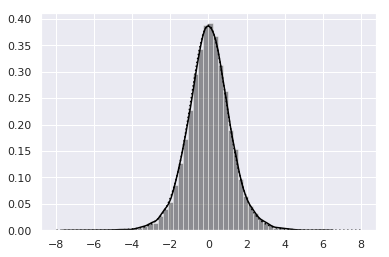

In [22]:
sns.distplot(t_value_array, 
             color = 'black', norm_hist = True)
plt.plot(x, stats.t.pdf(x = x, df = 9), 
         color = 'black', linestyle = 'dotted')

シミュレーション結果に合わせると、カーネル密度推定の結果とほぼ一致する

$t$分布の意義は<u>母分散がわかっていない状況であっても標本平均の分布について言及することができること</u><br>
t分布の導出の際、「標本から計算された標準誤差」で標本平均を標準化した<br>
これはかなり大胆で、母分散をわかっていない状況で標準化しているため<br>
逆に言えば、「標本から計算された標準誤差」で標本平均を標準化したときの結果がt分布に従うという事実を<br>
使うことで、得られた標本平均に関する不確実性を見積もることが可能となる<br>
これは区間推定を行う際に重要となる

結論として以下の二点がいえる（気がする）<br>
<u>「標本から計算された標準誤差」で標本平均を標準化したときの結果はt分布にしたがう（母集団分布が正規分布と仮定したとき）</u><br>
<u>t分布は標準正規分布に比べるとやや分散が大きいが、カーネル密度推定の結果とはほぼ一致し、標本分布を理論的に求められる</u>